In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import binary_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import itertools
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
devices=tf.config.experimental.list_physical_devices('GPU')
print("GPUS: ", len(devices))
tf.config.experimental.set_memory_growth(devices[0],True)

GPUS:  1


In [4]:
train_path = 'data/train'
test_path  = 'data/test'

In [15]:
train_batches = ImageDataGenerator().flow_from_directory(directory=train_path,target_size=(42,42),color_mode="grayscale",classes=['left','right'],batch_size=10)
test_batches = ImageDataGenerator().flow_from_directory(directory=test_path,target_size=(42,42),color_mode="grayscale",classes=['left','right'],batch_size=10,shuffle=False)

Found 1800 images belonging to 2 classes.
Found 184 images belonging to 2 classes.


In [16]:
def plotImages(images_arr):
  fig,axes = plt.subplots(1,10,figsize=(20,20))
  axes=axes.flatten()
  for img,ax in zip(images_arr,axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()


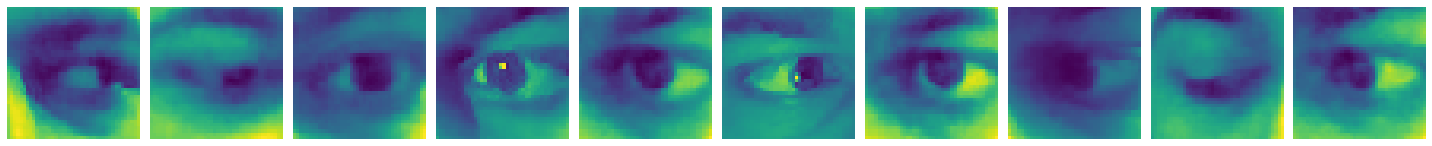

[[1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [17]:
imgs,labels= next(train_batches) 

plotImages(imgs)
print(labels)

In [18]:
print(imgs.shape)

(10, 42, 42, 1)


In [21]:
model= Sequential([
                   Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same',input_shape=(42,42,1)),
                   MaxPool2D(pool_size=(2,2),strides=1),
                   Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'),
                   MaxPool2D(pool_size=(2,2),strides=1),
    Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'),
                   MaxPool2D(pool_size=(2,2),strides=1),
                   Flatten(),
                   Dense(units=2,activation='softmax')
]
)  
model.summary()

TypeError: __init__() missing 1 required positional argument: 'kernel_size'